### Results  - Hive

In [1]:
from data_processing import *

In [2]:
SEPARATHOR = ','
XLSX_FILE_NAME = 'hive_results.xlsx'
# FILE_PATH = '../finished_tests/final_tests_allOthello_partHex.csv'
# FILE_PATH = '../finished_tests/copy_final_tests_almost_allOthello_allHex.csv'
# FILE_PATH = '../finished_tests/hive8_part_tests.csv'
FILE_PATH = '../finished_tests/hive10_almost_final_tests.csv'

In [3]:
df, result_df, df_tournament = process_data(FILE_PATH, SEPARATHOR, 'hive', True)

Amount data before check: 995
Amount data after check: 940


In [5]:
df_player, df_agg_by_player, df_agg_by_player_winner = create_aggregate_datas_hive(df)

In [ ]:
df.sample(1)

In [ ]:
result_df[:6]

In [ ]:
df_tournament.iloc[:6,:6]

In [ ]:
df_agg_by_player

In [ ]:
df_agg_by_player_winner

In [ ]:
writer = pd.ExcelWriter('hive_results.xlsx', engine='xlsxwriter')
result_df.to_excel(writer, sheet_name='result_df')
df_tournament.to_excel(writer, sheet_name='df_tournament')
if len(df.columns)>6:
    df_agg_by_player.to_excel(writer, sheet_name='df_agg_by_player')
    df_agg_by_player_winner.to_excel(writer, sheet_name='df_agg_by_player_winner')
writer.save()

In [5]:
from additional_functions import *
import numpy as np

In [8]:
def mean(x):
    return np.mean(x)

agg_dict = {'is_winner': 'sum',
            'is_draw': 'sum',
            'game_type': 'count',
            'player_queens_neighbours_count':  compose(mean,join_lists),
            'player_queens_neighbours_count_p': compose(mean,join_lists),
            'player_queens_neighbours_count_o': compose(mean,join_lists),
            'opponent_queens_neighbours_count':  compose(mean,join_lists),
            'opponent_queens_neighbours_count_p': compose(mean,join_lists),
            'opponent_queens_neighbours_count_o': compose(mean,join_lists),
            # 'player_pos_moves':[('mean', compose(mean,join_lists)),('mean_foreach_sep', mean_foreach_sep)],
            # 'opponent_pos_moves':[('mean', compose(mean,join_lists)),('mean_foreach_sep', mean_foreach_sep)],
            # 'player_unsed_pieces': [('sum_element_wise', compose(sum_lists_elemnet_wise,join_lists))],
            # 'opponent_unsed_pieces': [('sum_element_wise', compose(sum_lists_elemnet_wise,join_lists))],
            # 'player_switching_stats': [('strategies stats', compose(sum_lists_elemnet_wise,join_lists))]
            }
df_agg= df_player.groupby(by=['player'], as_index=True).agg(agg_dict)
# df_agg.columns = ['_'.join(col) for col in df_agg.columns.values]

In [28]:
def mean(x):
    return np.mean(x)

agg_dict = {'is_winner': 'sum',
            'is_draw': 'sum',
            'game_type': 'count',
            'player_queens_neighbours_count':  compose(np.median,join_lists),
            'player_queens_neighbours_count_p': compose(np.median,join_lists),
            'player_queens_neighbours_count_o': compose(np.median,join_lists),
            'opponent_queens_neighbours_count':  compose(np.median,join_lists),
            'opponent_queens_neighbours_count_p': compose(np.median,join_lists),
            'opponent_queens_neighbours_count_o': compose(np.median,join_lists),
            'player_pos_moves':[('mean', compose(np.median,join_lists))],
            'opponent_pos_moves':[('mean', compose(np.median,join_lists))],
            }
df_agg= df_player.groupby(by=['player'], as_index=True).agg(agg_dict)
# df_agg.columns = ['_'.join(col) for col in df_agg.columns.values]

In [29]:
df_agg

,is_winner,is_draw,game_type,player_queens_neighbours_count,player_queens_neighbours_count_p,player_queens_neighbours_count_o,opponent_queens_neighbours_count,opponent_queens_neighbours_count_p,opponent_queens_neighbours_count_o,player_pos_moves,opponent_pos_moves
,sum,sum,count,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,mean,mean
player,,,,,,,,,,,
alphabeta10,0,182,196,0.0,3.0,0.0,0.0,0.0,2.0,68.0,40.0
greedyhive_strategy,5,177,192,1.0,1.0,0.0,1.0,1.0,1.0,32.0,35.0
mcts500,5,171,189,1.0,1.0,0.0,1.0,0.0,1.0,34.0,36.0
mctsrave500,5,168,187,1.0,1.0,0.0,1.0,0.0,1.0,36.0,36.0
mctsrave_v2500,9,179,194,1.0,1.0,0.0,1.0,0.0,1.0,37.0,36.0
mctsstrategies500(evaluatehive_strategy:greedyhive_strategy),23,152,178,1.0,1.0,0.0,1.0,0.0,1.0,38.0,36.0
mctsstrategies500(random_strategy:evaluatehive_strategy:greedyhive_strategy),16,161,184,1.0,1.0,0.0,1.0,0.0,2.0,36.0,36.0
mctsstrategy500(evaluatehive_strategy),5,156,168,1.0,1.0,0.0,1.0,0.0,1.0,35.0,37.0


In [9]:
df_agg

,is_winner,is_draw,game_type,player_queens_neighbours_count,player_queens_neighbours_count_p,player_queens_neighbours_count_o,opponent_queens_neighbours_count,opponent_queens_neighbours_count_p,opponent_queens_neighbours_count_o
player,,,,,,,,,
alphabeta10,0,182,196,1.321042,2.463383,0.178700,0.885895,0.253223,1.518566
greedyhive_strategy,5,177,192,0.841903,1.089319,0.594487,1.096873,0.845481,1.348264
mcts500,5,171,189,0.920834,1.339663,0.502006,0.949987,0.362931,1.537042
mctsrave500,5,168,187,0.955357,1.431818,0.478896,0.902462,0.324405,1.480519
mctsrave_v2500,9,179,194,0.915644,1.336641,0.494646,0.950770,0.446069,1.455471
mctsstrategies500(evaluatehive_strategy:greedyhive_strategy),23,152,178,0.938193,1.422279,0.454106,0.946292,0.473714,1.418869
mctsstrategies500(random_strategy:evaluatehive_strategy:greedyhive_strategy),16,161,184,0.881990,1.432018,0.331963,0.964364,0.370888,1.557840
mctsstrategy500(evaluatehive_strategy),5,156,168,0.909770,1.456827,0.362713,0.939946,0.310427,1.569465
mctsstrategy500(greedyhive_strategy),32,161,196,0.938920,1.404959,0.472882,0.991865,0.559659,1.424070


In [10]:
writer = pd.ExcelWriter('hive_results1.xlsx', engine='xlsxwriter')
df_agg.to_excel(writer, sheet_name='result_df')

writer.save()

In [12]:
df_player.sample(1)

,game_type,player,is_winner,is_draw,seed,player_queens_neighbours_count,game_time,player_queens_neighbours_count_p,opponent_queens_neighbours_count,player_queens_neighbours_count_o,opponent_queens_neighbours_count_o,opponent_queens_neighbours_count_p,player_unsed_pieces,opponent_unsed_pieces,player_pos_moves,opponent_pos_moves,player_switching_stats,opponent_switching_stats
1366,hive,mctsrave_v2500,False,True,22020113,"[0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, ...",852.451393,"[0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","((1, 2, 2, 2, 2), (0, 2, 2, 2, 2), (0, 2, 2, 2...","((1, 3, 1, 2, 2), (1, 3, 1, 2, 2), (1, 3, 1, 2...","(30, 15, 24, 24, 32, 32, 64, 66, 66, 64, 74, 7...","(30, 15, 15, 5, 5, 32, 32, 32, 32, 32, 32, 22,...",[],"((243, 257), (245, 255), (244, 256), (246, 254..."


In [16]:
df_agg_by_player['player_unsed_pieces_sum_element_wise']

player
alphabeta10                                                                     [0.08548479632816983, 0.8250143430866322, 1.40...
greedyhive_strategy                                                             [0.1413396282089112, 2.3021540277367953, 1.416...
mcts500                                                                         [0.13150847961916096, 2.20470098185064, 1.1657...
mctsrave500                                                                     [0.13184828416616495, 2.187537627934979, 1.126...
mctsrave_v2500                                                                  [0.12903225806451613, 2.040395233943621, 1.247...
mctsstrategies500(evaluatehive_strategy:greedyhive_strategy)                    [0.1520708188428707, 1.8087258931394246, 1.242...
mctsstrategies500(random_strategy:evaluatehive_strategy:greedyhive_strategy)    [0.16371951219512196, 2.0128048780487804, 1.16...
mctsstrategy500(evaluatehive_strategy)                                          [0.

In [19]:
df_agg_by_player['player_unsed_pieces_sum_element_wise'].apply(lambda x : [round(y,2) for y in x])

player
alphabeta10                                                                     [0.09, 0.83, 1.41, 1.84, 0.92]
greedyhive_strategy                                                              [0.14, 2.3, 1.42, 1.29, 1.29]
mcts500                                                                          [0.13, 2.2, 1.17, 1.26, 1.23]
mctsrave500                                                                     [0.13, 2.19, 1.13, 1.18, 1.23]
mctsrave_v2500                                                                  [0.13, 2.04, 1.25, 1.24, 1.31]
mctsstrategies500(evaluatehive_strategy:greedyhive_strategy)                    [0.15, 1.81, 1.24, 1.11, 1.45]
mctsstrategies500(random_strategy:evaluatehive_strategy:greedyhive_strategy)    [0.16, 2.01, 1.17, 1.12, 1.31]
mctsstrategy500(evaluatehive_strategy)                                           [0.15, 2.06, 1.28, 1.2, 1.14]
mctsstrategy500(greedyhive_strategy)                                            [0.15, 1.87, 1.22, 1.07, 

In [20]:
np.unique(df_player['player'])

array(['alphabeta10', 'greedyhive_strategy', 'mcts500', 'mctsrave500',
       'mctsrave_v2500',
       'mctsstrategies500(evaluatehive_strategy:greedyhive_strategy)',
       'mctsstrategies500(random_strategy:evaluatehive_strategy:greedyhive_strategy)',
       'mctsstrategy500(evaluatehive_strategy)',
       'mctsstrategy500(greedyhive_strategy)', 'random_strategy'],
      dtype=object)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
player_name='mctsstrategies500(evaluatehive_strategy:greedyhive_strategy)'
df_switching_stats = get_switching_stats(df_player,player_name)
df_switching_stats.describe()

,evaluatehive,greedyhive
count,1763.000000,1763.000000
mean,241.800340,258.199660
std,13.549709,13.549709
min,141.000000,238.000000
25%,241.000000,251.000000
50%,246.000000,254.000000
75%,249.000000,259.000000
max,262.000000,359.000000


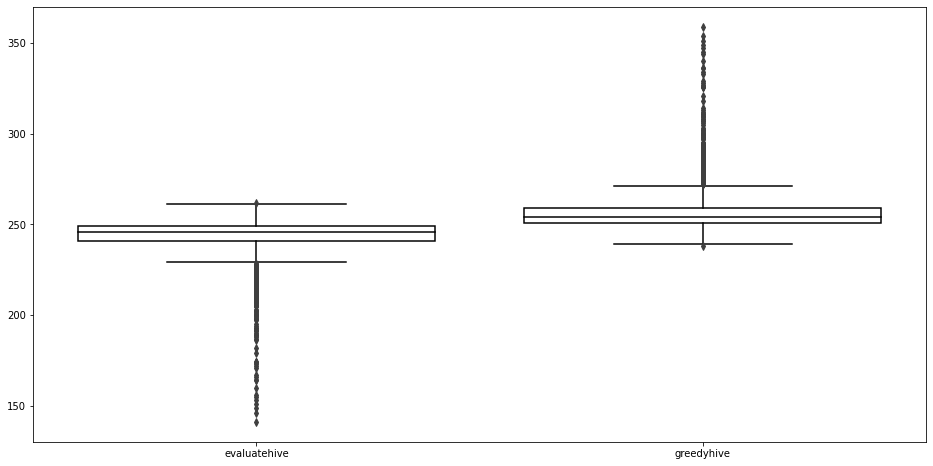

In [25]:
plt.figure(figsize=(16,8))
ax =sns.boxplot(data=df_switching_stats)

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

In [26]:
player_name='mctsstrategies500(random_strategy:evaluatehive_strategy:greedyhive_strategy)'
df_switching_stats = get_switching_stats(df_player,player_name)
df_switching_stats.describe()

,random,evaluatehive,greedyhive
count,1827.000000,1827.000000,1827.000000
mean,163.768473,163.844554,172.386973
std,4.976014,4.958086,9.828580
min,124.000000,124.000000,163.000000
25%,163.000000,163.000000,168.000000
50%,165.000000,165.000000,170.000000
75%,166.000000,167.000000,173.000000
max,175.000000,174.000000,252.000000


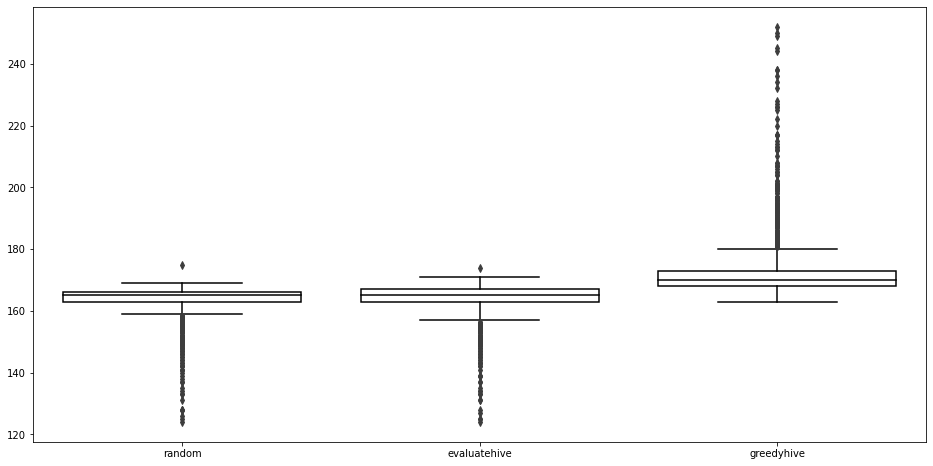

In [27]:
plt.figure(figsize=(16,8))
ax =sns.boxplot(data=df_switching_stats)

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')